In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [3]:
diabetes.head() #in 'Class', 1 means they do have diabetes, 0 means they don't
#trying to predict Class field

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree'] #columns to normalize; all except class to predict, strings, and categorical (e.g. group and Age)

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min()) / (x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [21]:
#these are continuous features
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [22]:
#these are categorical features; two methods: vocabulary list or hash bucket; 4 categories
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [23]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10) #at most 10 possible values for the category

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

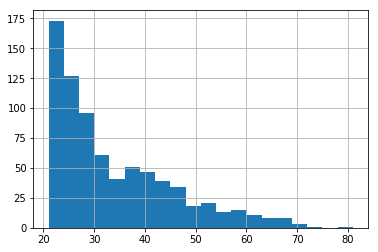

In [25]:
diabetes['Age'].hist(bins=20)

In [26]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80]) #taking a continuous value and making it categorical 

In [27]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,
            age_bucket] #list of all tf.feature columns

In [31]:
#Train Test Split
x_data = diabetes.drop('Class',axis=1) #only get the features, not the class column

In [30]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [32]:
labels = diabetes['Class']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [36]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,
                                                 num_epochs=1000,shuffle=True)

In [37]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpxmsqnunr', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [38]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpxmsqnunr/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 238.956
INFO:tensorflow:loss = 5.14418, step = 101 (0.419 sec)
INFO:tensorflow:global_step/sec: 252.992
INFO:tensorflow:loss = 5.59061, step = 201 (0.397 sec)
INFO:tensorflow:global_step/sec: 237.397
INFO:tensorflow:loss = 5.64401, step = 301 (0.421 sec)
INFO:tensorflow:global_step/sec: 253.143
INFO:tensorflow:loss = 3.64957, step = 401 (0.394 sec)
INFO:tensorflow:global_step/sec: 259.742
INFO:tensorflow:loss = 4.26953, step = 501 (0.386 sec)
INFO:tensorflow:global_step/sec: 238.021
INFO:tensorflow:loss = 5.52367, step = 601 (0.420 sec)
INFO:tensorflow:global_step/sec: 244.259
INFO:tensorflow:loss = 5.76459, step = 701 (0.409 sec)
INFO:tensorflow:global_step/sec: 219.333
INFO:tensorflow:loss = 4.69878, step = 801 (0.458 sec)
INFO:tensorflow:global_step/

In [39]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,
                                                     num_epochs=1,shuffle=False)

In [40]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-30-14:39:47
INFO:tensorflow:Restoring parameters from /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpxmsqnunr/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-30-14:39:48
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.731602, accuracy_baseline = 0.649351, auc = 0.808724, auc_precision_recall = 0.656787, average_loss = 0.524572, global_step = 1000, label/mean = 0.350649, loss = 5.04901, prediction/mean = 0.394423


In [41]:
results

{'accuracy': 0.73160172,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80872428,
 'auc_precision_recall': 0.65678686,
 'average_loss': 0.52457231,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0490088,
 'prediction/mean': 0.39442322}

In [42]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,
                                                     shuffle=False)
#with predictions, don't pass in a y-value since that's what we're trying to predict

In [43]:
predictions = model.predict(pred_input_func)

In [44]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmpxmsqnunr/model.ckpt-1000


In [45]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.57128888], dtype=float32),
  'logits': array([ 0.28711164], dtype=float32),
  'probabilities': array([ 0.42871115,  0.57128888], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.66168594], dtype=float32),
  'logits': array([ 0.67081618], dtype=float32),
  'probabilities': array([ 0.33831412,  0.66168594], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.40805498], dtype=float32),
  'logits': array([-0.37201178], dtype=float32),
  'probabilities': array([ 0.59194499,  0.40805498], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.39559394], dtype=float32),
  'logits': array([-0.42385805], dtype=float32),
  'probabilities': array([ 0.60440606,  0.39559394], dtype=float32)},
 {'class_ids': array([0]),
  'classes': arra

In [47]:
#dense nn classifier 
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,
                                       n_classes=2) #3 layers with 10 neurons each

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmppzha_6z0', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [48]:
dnn_model.train(input_fn=input_func,steps=1000)
#to use a feauture column on a dnn, must pass into an embedding column; else this error

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [50]:
#to use a feauture column on a dnn, must pass into an embedding column 
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4) 
#dimensions = A,B,C,D

In [51]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,
            age_bucket]

In [52]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,
                                                shuffle=True)

In [63]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmprhnm69sn', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [64]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmprhnm69sn/model.ckpt.
INFO:tensorflow:loss = 10.9454, step = 1
INFO:tensorflow:global_step/sec: 167.657
INFO:tensorflow:loss = 5.9762, step = 101 (0.606 sec)
INFO:tensorflow:global_step/sec: 242.604
INFO:tensorflow:loss = 5.16531, step = 201 (0.408 sec)
INFO:tensorflow:global_step/sec: 249.245
INFO:tensorflow:loss = 4.40188, step = 301 (0.406 sec)
INFO:tensorflow:global_step/sec: 241.067
INFO:tensorflow:loss = 3.36736, step = 401 (0.407 sec)
INFO:tensorflow:global_step/sec: 276.684
INFO:tensorflow:loss = 8.53301, step = 501 (0.367 sec)
INFO:tensorflow:global_step/sec: 241
INFO:tensorflow:loss = 4.87628, step = 601 (0.410 sec)
INFO:tensorflow:global_step/sec: 240.419
INFO:tensorflow:loss = 5.35219, step = 701 (0.430 sec)
INFO:tensorflow:global_step/sec: 249.528
INFO:tensorflow:loss = 5.17547, step = 801 (0.388 sec)
INFO:tensorflow:global_step/sec: 

In [65]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,
                                                     num_epochs=1,shuffle=False) 
#only 1 epoch since this is an evaluation

In [66]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-12-30-17:08:13
INFO:tensorflow:Restoring parameters from /var/folders/yh/ftwq6yz50j970hfx8k08g4880000gn/T/tmprhnm69sn/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-12-30-17:08:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.822839, auc_precision_recall = 0.699593, average_loss = 0.505229, global_step = 1000, label/mean = 0.350649, loss = 4.86283, prediction/mean = 0.312531


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8228395,
 'auc_precision_recall': 0.69959283,
 'average_loss': 0.50522906,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.8628297,
 'prediction/mean': 0.31253079}